In [54]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential,Model

In [55]:
image_size=[100,100]
model=VGG16(input_shape=image_size+[3],include_top=False, weights='imagenet')


In [56]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [57]:
for layers in model.layers:
  layers.trainable=False

In [58]:
model.output

<KerasTensor: shape=(None, 3, 3, 512) dtype=float32 (created by layer 'block5_pool')>

In [59]:
x= model.output

In [60]:
final=Model(inputs=model.input,outputs=Dense(1,activation="sigmoid")(Flatten()(x)))

In [61]:
final.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0   

In [62]:
model.input

<KerasTensor: shape=(None, 100, 100, 3) dtype=float32 (created by layer 'input_3')>

In [63]:
final.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [64]:
train_path="/content/drive/MyDrive/CollabNotebooks/training_set/training_set"
test_path="/content/drive/MyDrive/CollabNotebooks/test_set/test_set"

In [65]:
train_augmen=ImageDataGenerator(rescale=1./255,shear_range=0.3,zoom_range=0.2,horizontal_flip=True)
test_augmen=ImageDataGenerator(rescale=1./255)

In [66]:
final_train=train_augmen.flow_from_directory(train_path,target_size=(100,100),batch_size=35,class_mode='binary')

Found 8005 images belonging to 2 classes.


In [67]:
final_test=train_augmen.flow_from_directory(test_path,target_size=(100,100),batch_size=35,class_mode='binary')

Found 2023 images belonging to 2 classes.


In [72]:
l=len(final_test)
l

58

In [73]:
vgg16=final.fit_generator(final_train,epochs=5,steps_per_epoch=20,validation_data=final_test,validation_steps=l)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
20/20 [==============================] - 645s 33s/step - loss: 0.4988 - accuracy: 0.7586 - val_loss: 0.4695 - val_accuracy: 0.7830
Epoch 2/5
20/20 [==============================] - 427s 22s/step - loss: 0.4604 - accuracy: 0.7886 - val_loss: 0.4566 - val_accuracy: 0.7954
Epoch 3/5
20/20 [==============================] - 424s 22s/step - loss: 0.4134 - accuracy: 0.8271 - val_loss: 0.4231 - val_accuracy: 0.8102
Epoch 4/5
20/20 [==============================] - 397s 20s/step - loss: 0.4220 - accuracy: 0.7971 - val_loss: 0.4072 - val_accuracy: 0.8230
Epoch 5/5
20/20 [==============================] - 383s 20s/step - loss: 0.3808 - accuracy: 0.8514 - val_loss: 0.3946 - val_accuracy: 0.8211


In [79]:
final.save('vggmodel.h5')
#Saving our model file

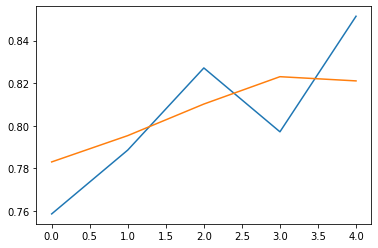

In [80]:
#Evaluating our model accuracy
import matplotlib.pyplot as plt
plt.plot(vgg16.history['accuracy'])
plt.plot(vgg16.history['val_accuracy'])
plt.show()

In [ ]:
#We saw that our model is not overfitted

In [82]:
import numpy as np
from tensorflow.keras.preprocessing import image
img=image.load_img('/content/drive/MyDrive/CollabNotebooks/test_set/test_set/cats/cat.4001.jpg',target_size=(100,100))


In [83]:
image_array=image.img_to_array(img)
image_array=np.expand_dims(image_array/255,axis=0)

In [84]:
final.predict(image_array)

array([[0.42038772]], dtype=float32)

In [ ]:
#We had 2 folders in our drive,First is cat and other is dog.
#Whenever we will have prediction less than 0.5 Then its a Cat 
#else if prediction is greater than 0.5 then its a dog